<a href="https://colab.research.google.com/github/xslittlemaggie/ML-DL-Algorithm-Notes/blob/master/K-Means%20iteration%20process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Implementation of KMeans  </center></h1>

Often, the data we encounter in real world won't have flags attached and won't provide labeled answers to the questions. Finding patterns in this type of data, unlabeled data, is a common theme in many machine learning applications. Unsupervised learning is how we find patterns and structure in these data.

**Clustering** is the most well-known unsupervised learning technique. It finds streucture in unlabeled data by identifying similar groups, or clusters. Examples of clustering applications are:

- **Recommendations engines:** group products to personalize the user experience

- **Search engines:** group news topics and search results

- **Market segmentation:** group customers based on geography, demography, and behaviors

- **Image segmentation:** medical imaging or road scene segmentation on self-driving cars

The goal of clustering is to separate data so that data similar to one another are in the same group, while data different from one another are in different groups. So two questions arise:

- How many groups do we choose?

- How do we define similarity?

**K-Means** is the most popular and well-known clustering algorithm, and it tries to address these two questions.

- The K refers to the number of clusters(groups) we expect to find in a dataset.

- The Means refers to the average distance of data to each cluster center, also known as the centroid, which we are trying to minimize.

It is an iterative approach:

1. Place K random centroids for the initial clusters.

2. Assign data samples to the nearest centroid.

3. Udate centroids based on the above=assigned data samples.

Repeat Steps 2 and 3 until convergence (when points don't move between clusters and centroids stabilize).

Once we are happy with our clusters, we can take a new unlabeled datapoint and quickly assign it to the appropriate cluster.

# **Step 0**: Import library

In [0]:
from sklearn import datasets
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

# **Step 1**: Iris Dataset

Take the Iris dataset as example. 

In [159]:
iris = datasets.load_iris()
X = iris.data
X = pd.DataFrame(X, columns = iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- **Column 0:** Sepal length
- **Column 1:** Sepal width
- **Column 2:** Petal length
- **Column 3:** Petal width

# **Step 2**: A pilot practice of Kmeans with two features

In [0]:
data = iris.data
samples = data
target = iris.target
x = data[:, 0] # feature 1
y = data[:, 1] # feature 2
sepal_length_width = data[:, :2]

## 1. Scatter plot of the data

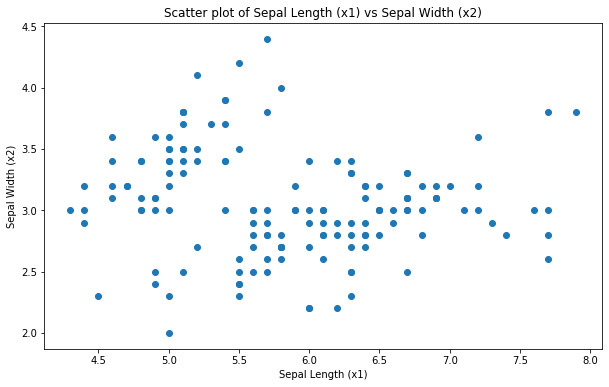

In [161]:
plt.figure(figsize = (10, 6))
plt.scatter(x, y)
plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p1")
plt.show()

From the scatterplot above, based on these two features, the datapoints could be generalized into 2 groups. 

# **Step 3**: Implementation of K-Means

## 1. Place k random centroids for the initial clusters, e.g., k = 3

In [0]:
# Create a variable named k and set it to 3
k = 3

use random.uniform() function to generate random values in two lists

- a centroids_x list that will have k random values between min(x) and mx(x)

- a centroids_y list that wil lhave k random values between min(y) and max(y)

The random.uniform() function looks like: **np.random.uniform(low, high, size)**

In [0]:
centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)

In [0]:
# create an array named centroids
centroids = np.array(list(zip(centroids_x, centroids_y)))

In [165]:
# to make my presentation result consistent, I use the centroids randomly selected at the first time

centroids = np.array([[4.58936792, 2.0333023], [6.37458669, 3.2663497], [7.53819634, 3.05149302]])
centroids

array([[4.58936792, 2.0333023 ],
       [6.37458669, 3.2663497 ],
       [7.53819634, 3.05149302]])

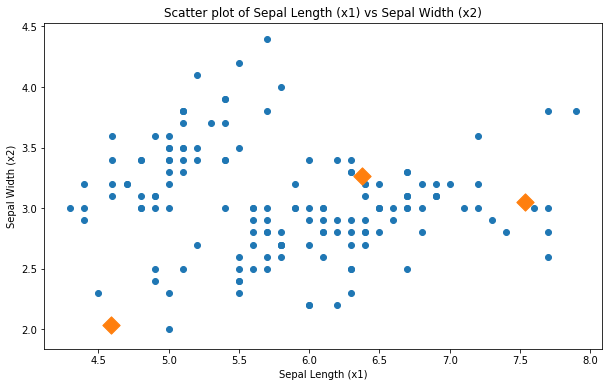

In [166]:
centroids_x_0 = [4.58936792, 6.37458669,  7.53819634]
centroids_y_0 = [2.0333023, 3.2663497, 3.05149302]

# datapoints visualization with the initial points
plt.figure(figsize = (10, 6))
plt.scatter(x, y)
plt.scatter(centroids_x_0, centroids_y_0, marker='D', s=150)
plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

In [0]:
df = pd.DataFrame(sepal_length_width, columns = ["x1", "x2"])


## 2. Assign data points to the nearest centroid

write a distance() function to iterate through each datapoint and compute the distance from each data point to each of the 3 centroids

For example, if we have a point and a list of the three distances in distances and it looks like [15, 20, 5], then we would want to assign the data point to the 3rd centroid. The argmin(distances) would return the index of the lowest corresponding distance, 2.

In [0]:
def distance(a, b):
  distance = 0
  for i in range(len(a)):
    distance += (a[i]-b[i]) ** 2 
    
  return distance ** 0.5

# create an array called labels that will hold the cluster labels for each data point. its size should be the lenght of the data 
labels = np.zeros(len(samples))

# create an array called distances that will hold the distances for each centroid. It shoul dhave the size of K
distances = np.zeros(k)

To assign each data point to the closet centroid, we need to iterate through the whole data sample and calculate each data point's distance to each centroid. 

We can get the index of the smallest distance of distance.

In [0]:
centroids_x_0 = [4.58936792, 6.37458669,  7.53819634]
centroids_y_0 = [2.0333023, 3.2663497, 3.05149302]

centroids_0 = [[4.58936792, 2.0333023], [6.37458669, 3.2663497], [7.53819634, 3.05149302]]

dist_to_c1 = []
dist_to_c2 = []
dist_to_c3 = []
for i in range(len(sepal_length_width)):
  distances[0] = distance(sepal_length_width[i], centroids_0[0])
  dist_to_c1.append(distance(sepal_length_width[i], centroids_0[0]))
  
  distances[1] = distance(sepal_length_width[i], centroids_0[1])
  dist_to_c2.append(distance(sepal_length_width[i], centroids_0[1]))

  distances[2] = distance(sepal_length_width[i], centroids_0[2])
  dist_to_c3.append(distance(sepal_length_width[i], centroids_0[2]))

  cluster = np.argmin(distances)
  labels[i] = cluster

In [170]:
df1 = pd.DataFrame(sepal_length_width, columns = ["x1", "x2"])

dist = list(zip(dist_to_c1, dist_to_c2, dist_to_c3))
df2 = pd.DataFrame(dist, columns = ["dist_to_c1", "dist_to_c2", "dist_to_c3"])
df3 = pd.DataFrame(labels, columns = ["Label"])
df = pd.concat([df1, df2, df3], axis = 1)
df.head(10)

,x1,x2,dist_to_c1,dist_to_c2,dist_to_c3,Label
0,5.1,3.5,1.553045,1.295825,2.479105,1.0
1,4.9,3.0,1.015380,1.498449,2.638699,0.0
2,4.7,3.2,1.171931,1.675901,2.842079,0.0
3,4.6,3.1,1.066751,1.782366,2.938597,0.0
4,5.0,3.6,1.619617,1.414500,2.596787,1.0
5,5.4,3.9,2.035113,1.162468,2.300402,1.0
6,4.6,3.4,1.366739,1.779612,2.958793,0.0
7,5.0,3.4,1.427053,1.381069,2.562010,1.0
8,4.4,2.9,0.887144,2.008284,3.141851,0.0
9,4.9,3.1,1.111007,1.483940,2.638642,0.0


# 0 iteration

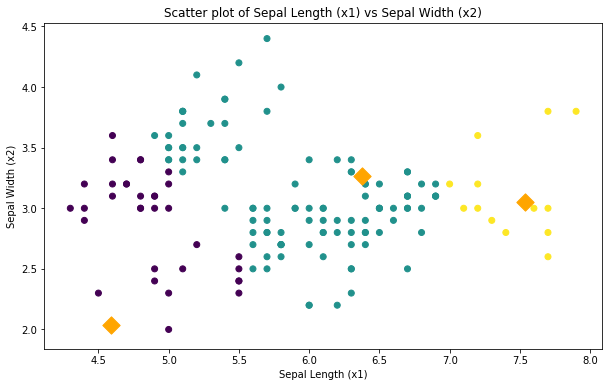

In [171]:
centroids_x_0 = [4.58936792, 6.37458669,  7.53819634]
centroids_y_0 = [2.0333023, 3.2663497, 3.05149302]

centroids_0 = [[4.58936792, 2.0333023], [6.37458669, 3.2663497], [7.53819634, 3.05149302]]

for i in range(len(sepal_length_width)):
  distances[0] = distance(sepal_length_width[i], centroids_0[0])
  distances[1] = distance(sepal_length_width[i], centroids_0[1])
  distances[2] = distance(sepal_length_width[i], centroids_0[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

# datapoints visualization with the initial points
plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = labels)
plt.scatter(centroids_x_0, centroids_y_0, marker='D', s=150, c = "orange")
plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

# 1st iteration

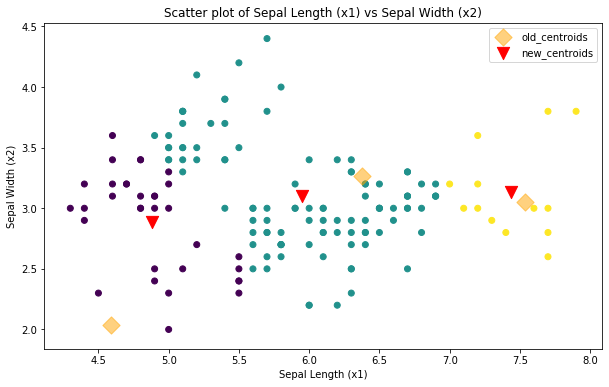

In [172]:
centroids_0 = [[4.58936792, 2.0333023], [6.37458669, 3.2663497], [7.53819634, 3.05149302]]

for i in range(len(sepal_length_width)):
  distances[0] = distance(sepal_length_width[i], centroids_0[0])
  distances[1] = distance(sepal_length_width[i], centroids_0[1])
  distances[2] = distance(sepal_length_width[i], centroids_0[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

centroids_x_0 = [4.58936792,6.37458669, 7.53819634]
centroids_y_0 = [2.0333023, 3.2663497, 3.05149302]

centroids_x_1 = [x[(labels == 0)].mean(), x[(labels == 1)].mean(), x[(labels == 2)].mean()]
centroids_y_1 = [y[(labels == 0)].mean(), y[(labels == 1)].mean(), y[(labels == 2)].mean()]

plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = labels)
plt.scatter(centroids_x_0, centroids_y_0, marker='D', c = "orange", s=150, alpha = 0.5, label = "old_centroids")
plt.scatter(centroids_x_1, centroids_y_1, marker='v', c = "red", s=150, label = "new_centroids")

plt.legend()
plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

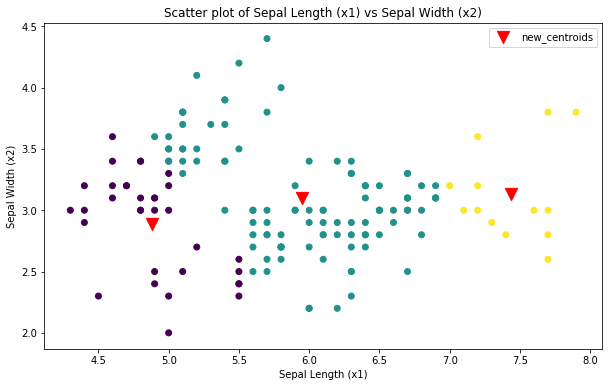

In [173]:
plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = labels)
#plt.scatter(centroids_x_0, centroids_y_0, marker='D', c = "orange", s=150, alpha = 0.5, label = "old_centroids")
plt.scatter(centroids_x_1, centroids_y_1, marker='v', c = "red", s=150, label = "new_centroids")

plt.legend()
plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

# 2nd iteration

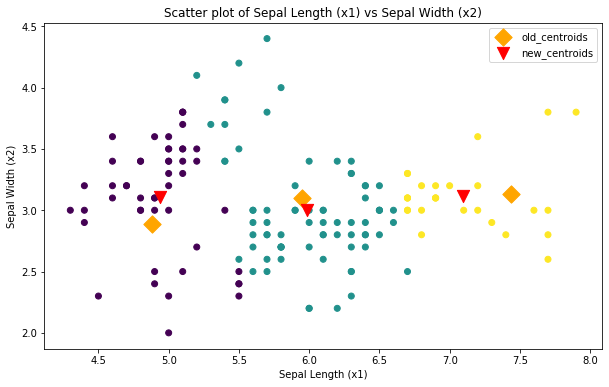

In [174]:
centroids_0 = [[x[(labels == 0)].mean(), y[(labels == 0)].mean()], 
               [x[(labels == 1)].mean(), y[(labels == 1)].mean()], 
               [x[(labels == 2)].mean(), y[(labels == 2)].mean()]]

for i in range(len(sepal_length_width)):
  distances[0] = distance(sepal_length_width[i], centroids_0[0])
  distances[1] = distance(sepal_length_width[i], centroids_0[1])
  distances[2] = distance(sepal_length_width[i], centroids_0[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

centroids_x_0 = [centroids_0[i][0] for i in range(len(centroids_0))]
centroids_y_0 = [centroids_0[i][1] for i in range(len(centroids_0))]

centroids_x_1 = [x[(labels == 0)].mean(), x[(labels == 1)].mean(), x[(labels == 2)].mean()]
centroids_y_1 = [y[(labels == 0)].mean(), y[(labels == 1)].mean(), y[(labels == 2)].mean()]

plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = labels)
plt.scatter(centroids_x_0, centroids_y_0, marker='D', c = "orange", s=150, label = "old_centroids")
plt.scatter(centroids_x_1, centroids_y_1, marker='v', c = "red", s=150, label = "new_centroids")
plt.legend()

plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

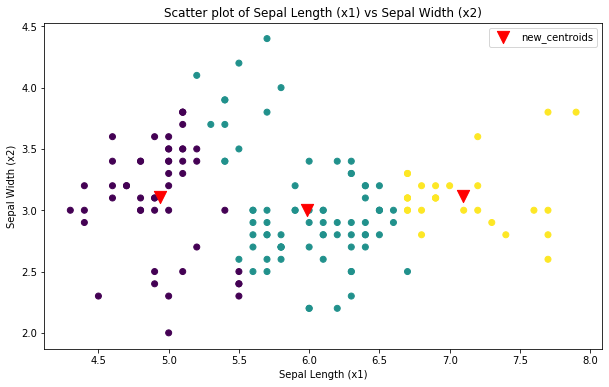

In [175]:
plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = labels)
#plt.scatter(centroids_x_0, centroids_y_0, marker='D', c = "orange", s=150, label = "old_centroids")
plt.scatter(centroids_x_1, centroids_y_1, marker='v', c = "red", s=150, label = "new_centroids")
plt.legend()

plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

## 3rd iteration

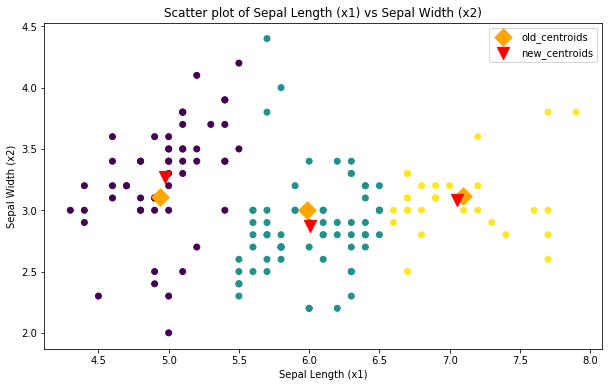

In [176]:
# update the centroids
centroids_0 = [[x[(labels == 0)].mean(), y[(labels == 0)].mean()], 
               [x[(labels == 1)].mean(), y[(labels == 1)].mean()], 
               [x[(labels == 2)].mean(), y[(labels == 2)].mean()]]

for i in range(len(sepal_length_width)):
  distances[0] = distance(sepal_length_width[i], centroids_0[0])
  distances[1] = distance(sepal_length_width[i], centroids_0[1])
  distances[2] = distance(sepal_length_width[i], centroids_0[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

centroids_x_0 = [centroids_0[i][0] for i in range(len(centroids_0))]
centroids_y_0 = [centroids_0[i][1] for i in range(len(centroids_0))]

centroids_x_1 = [x[(labels == 0)].mean(), x[(labels == 1)].mean(), x[(labels == 2)].mean()]
centroids_y_1 = [y[(labels == 0)].mean(), y[(labels == 1)].mean(), y[(labels == 2)].mean()]

plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = labels)
plt.scatter(centroids_x_0, centroids_y_0, marker='D', c = "orange", s=150, label = "old_centroids")
plt.scatter(centroids_x_1, centroids_y_1, marker='v', c = "red", s=150, label = "new_centroids")
plt.legend()

plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

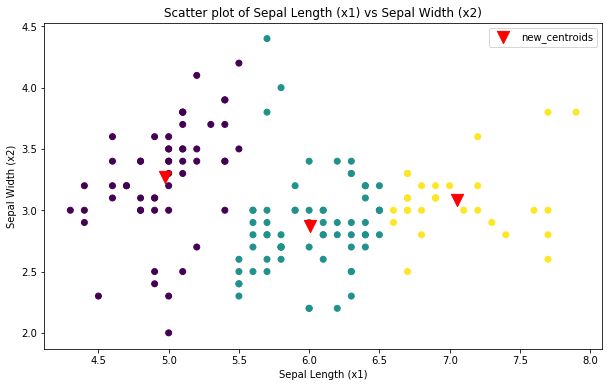

In [177]:
plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = labels)
#plt.scatter(centroids_x_0, centroids_y_0, marker='D', c = "orange", s=150, label = "old_centroids")
plt.scatter(centroids_x_1, centroids_y_1, marker='v', c = "red", s=150, label = "new_centroids")
plt.legend()

plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

# 4th or More iterations

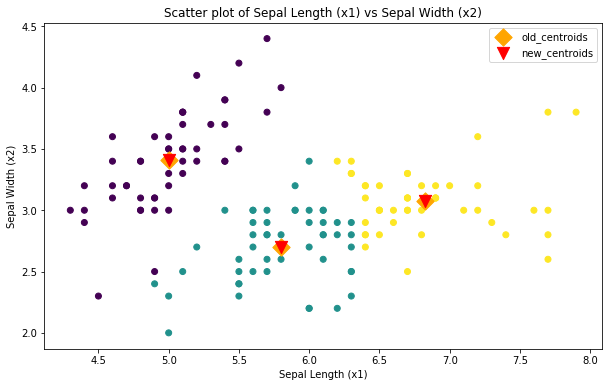

In [198]:
# update the centroids
centroids_0 = [[x[(labels == 0)].mean(), y[(labels == 0)].mean()], 
               [x[(labels == 1)].mean(), y[(labels == 1)].mean()], 
               [x[(labels == 2)].mean(), y[(labels == 2)].mean()]]

for i in range(len(sepal_length_width)):
  distances[0] = distance(sepal_length_width[i], centroids_0[0])
  distances[1] = distance(sepal_length_width[i], centroids_0[1])
  distances[2] = distance(sepal_length_width[i], centroids_0[2])
  cluster = np.argmin(distances)
  labels[i] = cluster

centroids_x_0 = [centroids_0[i][0] for i in range(len(centroids_0))]
centroids_y_0 = [centroids_0[i][1] for i in range(len(centroids_0))]

centroids_x_1 = [x[(labels == 0)].mean(), x[(labels == 1)].mean(), x[(labels == 2)].mean()]
centroids_y_1 = [y[(labels == 0)].mean(), y[(labels == 1)].mean(), y[(labels == 2)].mean()]

plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = labels)
plt.scatter(centroids_x_0, centroids_y_0, marker='D', c = "orange", s=150, label = "old_centroids")
plt.scatter(centroids_x_1, centroids_y_1, marker='v', c = "red", s=150, label = "new_centroids")
plt.legend()

plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

# True clusters

No handles with labels found to put in legend.


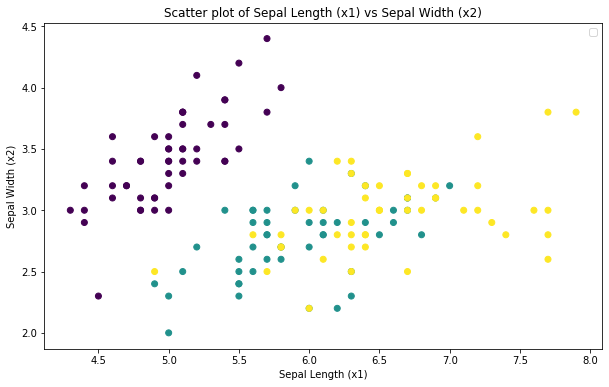

In [179]:
plt.figure(figsize = (10, 6))
plt.scatter(x, y, c = iris.target)
##plt.scatter(centroids_x_0, centroids_y_0, marker='D', c = "orange", s=150, label = "old_centroids")
#plt.scatter(centroids_x_1, centroids_y_1, marker='v', c = "red", s=150, label = "new_centroids")
plt.legend()

plt.title("Scatter plot of Sepal Length (x1) vs Sepal Width (x2)")
plt.xlabel("Sepal Length (x1)")
plt.ylabel("Sepal Width (x2)")
plt.savefig("p2")
plt.show()

# **Part 2**: Implementing K-Means with Scikit-Learn

### 1. Create & fit the model

In [0]:
from sklearn.cluster import KMeans

In [181]:
model = KMeans(n_clusters = 3)
model.fit(samples) # the data without labels
labels = model.predict(samples)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


### 2. Predict on new datasets

In [0]:
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],
   [6.5, 3. , 5.5, 0.4],
   [5.8, 2.7, 5.1, 1.9]])

In [183]:
new_predictions = model.predict(new_samples)
print(new_predictions)

[0 1 1]


### 3. Visualize After K-Means

Text(0, 0.5, 'sepal width')

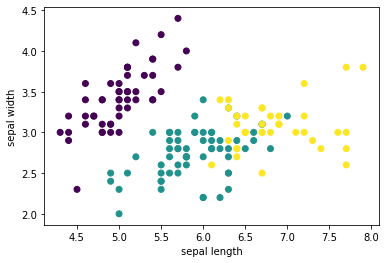

In [184]:
plt.scatter(x, y, c=labels)

plt.xlabel('sepal length')
plt.ylabel('sepal width')

### 4. Evaluation

In [0]:
species = np.chararray(target.shape, itemsize=150)

for i in range(len(samples)):
  if target[i] == 0:
    species[i] = 'setosa'
  elif target[i] == 1:
    species[i] = 'veriscolor'
  elif target[i] == 2: 
    species[i] = 'virginica'

In [0]:
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': species})  # labels are the results predicted from the model

In [187]:
ct = pd.crosstab(df['labels'], df['species'])

print(ct)

species  b'setosa'  b'veriscolor'  b'virginica'
labels                                         
0               50              0             0
1                0             48            14
2                0              2            36


### 5. More discussion about the number of Cluster

At this point, we have grouped the Iris plants into 3 clusters because we know the Iris has three groups. 
How about if we don't have this information before?

Good clustering results in tight clusters, meaning that the samples in each cluster are bunched together. How spread out the clusters are is measured by inertia. Inertia is the distance from each sample to the centroid of its cluster. The lower the inertia is, the better our model has doen. 

In [188]:
print(model.inertia_)

78.85144142614601


In [0]:
num_clusters = list(range(1, 9))

inertias = []
for i in num_clusters:
  model = KMeans(n_clusters = i)
  model.fit(samples)
  inertia = model.inertia_
  inertias.append(inertia)

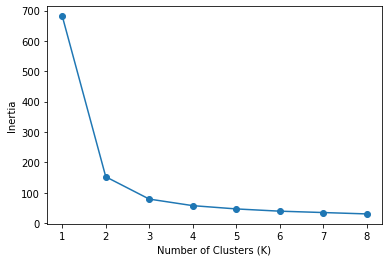

In [190]:
plt.plot(num_clusters, inertias, '-o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()